In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms

from nnet_cnn import *
from activation_funcs import *
from loss_funcs import *


In [2]:
np.random.seed(1)

In [3]:
KERNEL_SIZE = 3
OUTPUT_DEPTH = 3
NUM_TRAINING_IMAGES = 25
NUM_EPOCHS = 20
LEARNING_RATE = 1.0e-9

In [4]:
np_dtype = np.float32

# Utility functions for preprocessing data
def preprocess(data: torch.Tensor):
    data_np: np.ndarray = data.numpy()
    data_float = np.asarray(data_np, dtype = np_dtype)
    data_reduced = data_float[:NUM_TRAINING_IMAGES, :, :]
    data_reshaped = data_reduced.reshape((data_reduced.shape[0], 1, data_reduced.shape[1], data_reduced.shape[2]))
    return data_reshaped / 255.0

def encode_mnist(targets: np.ndarray):
    encoded_targets = np.zeros((np.size(targets), 10))
    for idx, target in enumerate(targets):
        vec = np.zeros((10,), dtype = np_dtype)
        vec[target] = 1
        encoded_targets[idx, :] = vec

    return encoded_targets

In [5]:
# Acquire training data for MNIST dataset
mnist_train = dsets.MNIST(root = 'datasets/MNIST_data/',
                          train = True,
                          transform = transforms.ToTensor(),
                          download = True)

input_data = preprocess(mnist_train.data)
output_data = encode_mnist(mnist_train.targets.numpy())

Text(0.5, 1.0, 'MNIST dataset examples')

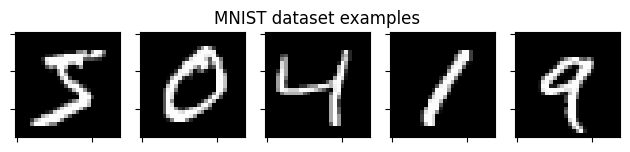

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 5, tight_layout = True)
for i in range(5):
    ax[i].imshow(input_data[i, 0, :, :], cmap = "gray")
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])

ax[5 // 2].set_title("MNIST dataset examples")

In [7]:
shape = InputShape(*input_data.shape[1:])
shape

InputShape(depth=1, height=28, width=28)

In [8]:
conv2d_CV = Conv2D(
    input_depth = shape.depth,
    input_height = shape.height,
    input_width = shape.width,
    output_depth = OUTPUT_DEPTH,
    kernel_size = KERNEL_SIZE
)

In [9]:
max_pool_2d_CV = MaxPool2D(
    shape.depth, 
    shape.height - KERNEL_SIZE + 1, 
    shape.width - KERNEL_SIZE + 1
)

In [10]:
nnet = CNN(
    layers = [
        conv2d_CV,                                          # Conv2D layer
        Sigmoid(),                                          # Sigmoid activation layer
        max_pool_2d_CV,                                     # MaxPool2D layer
        Sigmoid(),                                          # Sigmoid activation layer    
        Flatten(),                                          # Reshape layer: flatten to 1D
        Dense(np.prod(max_pool_2d_CV._output.shape), 15),   # Dense layer: (D)*(H-K+1)*(W-K+1) -> 15
        Sigmoid(),                                          # Sigmoid activation layer
        Dense(15, 10),                                      # Dense layer: 15 -> 10
        Sigmoid()                                           # Sigmoid activation layer
    ],
    loss = MSE()                                            # Loss function: MSE
)

In [11]:
nnet.train(
    input_ = input_data,
    output_ = output_data,
    epochs = NUM_EPOCHS,
    rate = LEARNING_RATE
)

Epoch: 1/20. Error = 4.346991410912087
Epoch: 2/20. Error = 4.335915977895615
Epoch: 3/20. Error = 4.332745623139882
Epoch: 4/20. Error = 4.331476216490086
Epoch: 5/20. Error = 4.330890766104635
Epoch: 6/20. Error = 4.33052670672711
Epoch: 7/20. Error = 4.330256309403419


c:\school\ecen-644-notebook\activation_funcs.py:28: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


Epoch: 8/20. Error = 4.3300396080943475
Epoch: 9/20. Error = 4.329859707995389
Epoch: 10/20. Error = 4.329707629893096
Epoch: 11/20. Error = 4.329577939795863
Epoch: 12/20. Error = 4.329466953018363
Epoch: 13/20. Error = 4.329371867033639
Epoch: 14/20. Error = 4.329290356152291
Epoch: 15/20. Error = 4.329220400444984
Epoch: 16/20. Error = 4.329160221087494
Epoch: 17/20. Error = 4.329108256295327
Epoch: 18/20. Error = 4.329063148237488
Epoch: 19/20. Error = 4.329023729886749
Epoch: 20/20. Error = 4.328989009117167


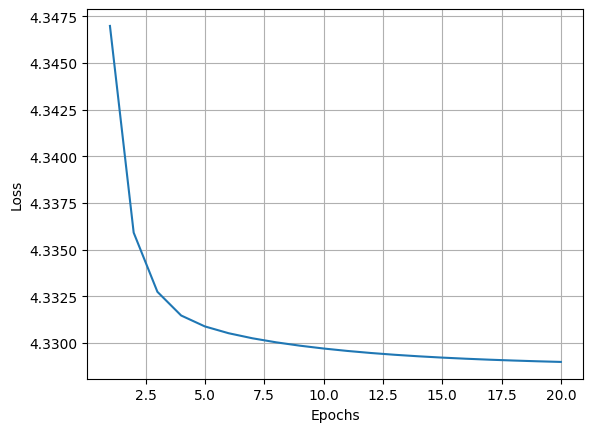

In [12]:
plt.plot(1 + np.arange(20), nnet._errors)
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.grid()